In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

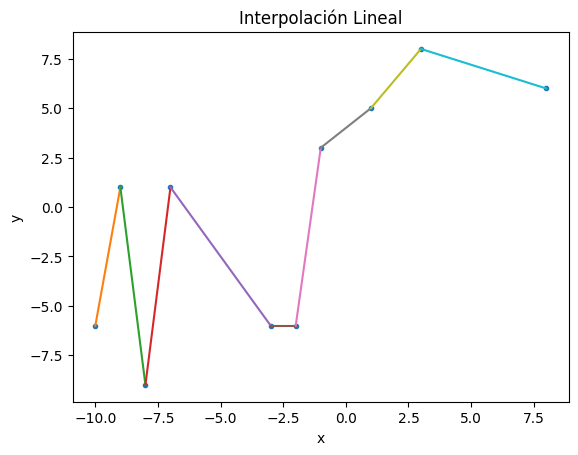

In [6]:
# Definición del número de puntos a generar
num_points = 10

# Creación de arrays vacíos para x e y
y = np.zeros(num_points)
x = np.zeros(num_points)

# Generación aleatoria de puntos x e y
for i in range(num_points):
    p = np.random.randint(-num_points, num_points)
    while p in x:
        p = np.random.randint(-num_points, num_points)
    x[i] = p
    y[i] = np.random.randint(-num_points, num_points)

# Ordenar el array x en orden ascendente
x = np.sort(x)

# Graficar los puntos (x, y)
plt.plot(x, y, ".")

# Realizar interpolación lineal entre los puntos
for j in range(num_points - 1):
    xx = np.linspace(x[j], x[j+1], 2)
    f = (y[j+1] - y[j]) / (x[j+1] - x[j]) * (xx - x[j]) + y[j]
    plt.plot(xx, f)

# Etiquetas y título para la gráfica
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación Lineal")

# Mostrar la gráfica resultante
plt.show()

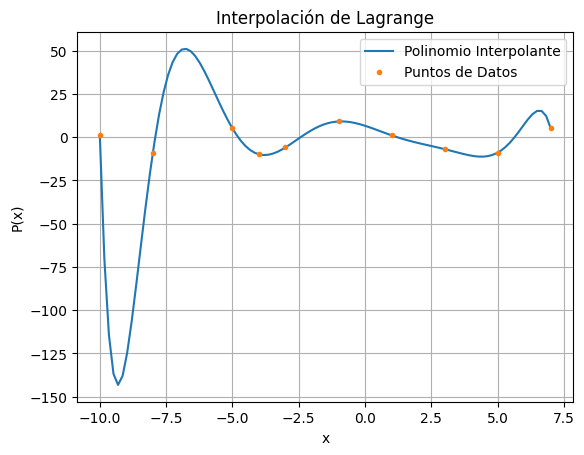

In [ ]:
# Definición de la función L para calcular los polinomios base de Lagrange
def L(xx, x, n, j):
    l = 1
    for i in range(n):
        if i != j:
            l *= (xx - x[i]) / (x[j] - x[i])
    return l

# Definición de la función P para calcular el polinomio interpolante de Lagrange
def P(xx, x, y, n):
    p = 0
    for j in range(n):
        p += y[j] * L(xx, x, n, j)
    return p

# Símbolo simbólico para xx (variable independiente)
xx = sp.symbols("x")

# Obtiene la cantidad de puntos de interpolación
n = len(x)  #

# Calcula el polinomio interpolante de Lagrange P(x)
P_x = P(xx, x, y, n)

# Convierte el polinomio simbólico a una función numérica
P_numeric = sp.lambdify(xx, P_x, 'numpy')

# Genera valores de x para la representación gráfica
x_values = np.linspace(x[0], x[-1], 100)

# Calcula los valores correspondientes de y usando el polinomio interpolante
y_values = P_numeric(x_values)

# Grafica el polinomio interpolante y los puntos originales
plt.plot(x_values, y_values, label='Polinomio Interpolante')
plt.plot(x, y, ".", label='Puntos de Datos')
plt.title("Interpolación de Lagrange")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)
plt.show()